In [1]:
import csv
import json
import os
import sys
import matplotlib.pyplot as plt
import networkx as nx



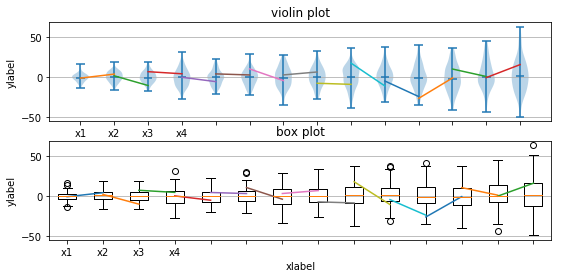

In [2]:
"""
===================================
Box plot vs. violin plot comparison
===================================

Note that although violin plots are closely related to Tukey's (1977)
box plots, they add useful information such as the distribution of the
sample data (density trace).

By default, box plots show data points outside 1.5 * the inter-quartile
range as outliers above or below the whiskers whereas violin plots show
the whole range of the data.

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf

Violin plots require matplotlib >= 1.4.

For more information on violin plots, the scikit-learn docs have a great
section: http://scikit-learn.org/stable/modules/density.html
"""

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 4))

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 20)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')
    for i in range(len(all_data)-1):
        ax.plot([i+1, i+2], [all_data[i][-1], all_data[i+1][0]])

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()


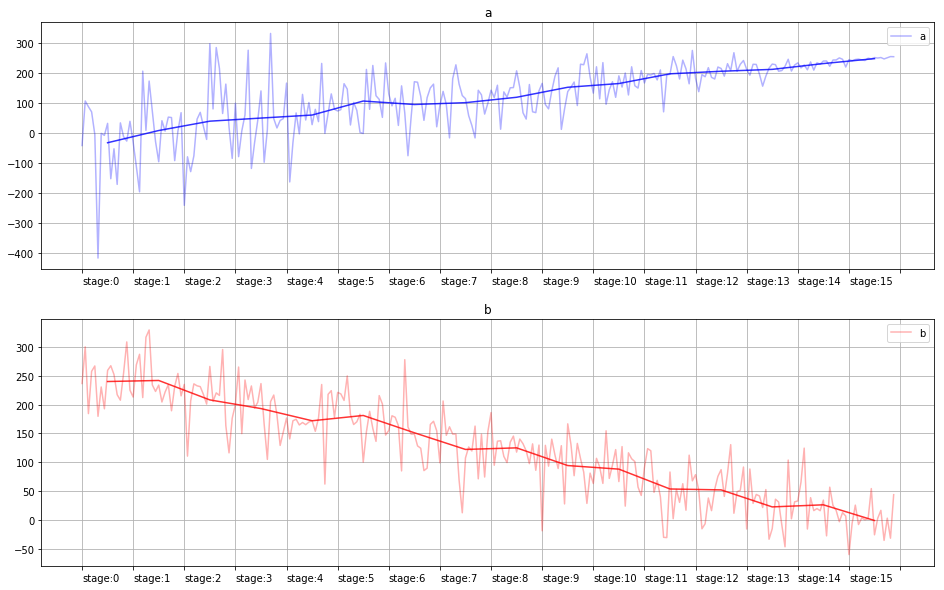

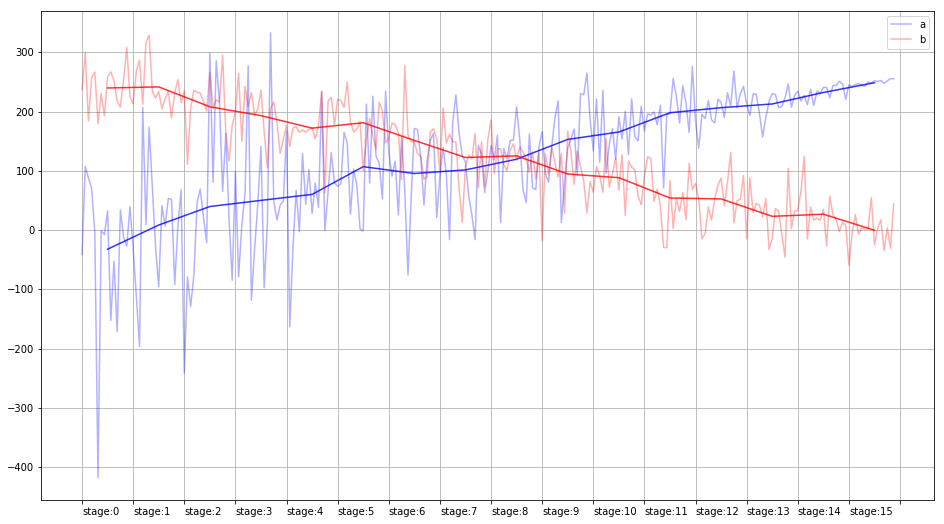

In [57]:
"""
===================================
Box plot vs. violin plot comparison
===================================

Note that although violin plots are closely related to Tukey's (1977)
box plots, they add useful information such as the distribution of the
sample data (density trace).

By default, box plots show data points outside 1.5 * the inter-quartile
range as outliers above or below the whiskers whereas violin plots show
the whole range of the data.

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf

Violin plots require matplotlib >= 1.4.

For more information on violin plots, the scikit-learn docs have a great
section: http://scikit-learn.org/stable/modules/density.html
"""

import matplotlib.pyplot as plt
import numpy as np
from math import ceil,sin
%matplotlib inline
def the_time_plot(ax, all_data, color, group_num, title):

    group_data = [all_data[i*group_num:min((i+1)*group_num, len(all_data))] for i in range(int(ceil(len(all_data)*1.0/group_num)))]
    #all_data = [np.random.normal(std*5, std, 100) for std in range(6, 20)]

    # plot violin plot
    # plot box plot
    N = len(all_data)
    M = len(group_data)
    ax.plot(list(range(N)), all_data, alpha=0.3,color=color, label=title)
    ax.set_xticks([y+1 for y in range(N)])

    g_x = [(i+0.5)*group_num for i in range(M)]
    g_max = [np.max(group_data[i]) for i in range(M)]
    g_avg = [np.average(group_data[i]) for i in range(M)]
    g_med = [np.median(group_data[i]) for i in range(M)]
    g_std = [np.std(group_data[i]) for i in range(M)]
    g_min = [np.min(group_data[i]) for i in range(M)]
    g_p25 = [np.percentile(group_data[i], 25) for i in range(M)]
    g_p75 = [np.percentile(group_data[i], 75) for i in range(M)]
    g_std_u = [g_avg[i] + g_std[i] for i in range(M)]
    g_std_d = [g_avg[i] - g_std[i] for i in range(M)]
#    g_orgs = [g_min, g_p25, g_med, g_p75, g_max]
    g_orgs = [g_avg]
    g_alpha = [0.8, 0.4, 0.4,0.2]
    g_color = [color] * 4
    if len(g_orgs) <= 1:
        for i in range(len(g_orgs)):
            ax.plot(g_x, g_orgs[i], alpha=g_alpha[i], color=g_color[i])
    else:
        for i in range(len(g_orgs)-1):
            ax.fill_between(g_x, g_orgs[i], g_orgs[i+1], alpha=g_alpha[i], color=g_color[i])
    ax.set_xticklabels(["stage:%i"%i for i in range(M)], horizontalalignment='left')
    ax.set_xticks([i*group_num for i in range(M+1)])

    # adding horizontal grid lines

def draw_concate(all_datas, group_num, colors,titles, save_fig_path=None):
    Ln = len(all_datas)
    fig, axs = plt.subplots(nrows=Ln, ncols=1,figsize=(16, 5*Ln))
    for i in range(Ln):
        the_time_plot(axs[i], all_datas[i], colors[i], group_num, titles[i])
        axs[i].set_title(titles[i])
        axs[i].legend()
        axs[i].yaxis.grid(True)
        axs[i].xaxis.grid(True)
    if save_fig_path is not None:
        plt.savefig(save_fig_path)
    plt.show()

def draw_lay(all_datas, group_num, colors,titles, save_fig_path=None):
    Ln = len(all_datas)
    fig, axs = plt.subplots(figsize=(16, 9))
    for i in range(Ln):
        the_time_plot(axs, all_datas[i], colors[i],group_num, titles[i])
        axs.yaxis.grid(True)
        axs.xaxis.grid(True)
        axs.legend()
    if save_fig_path is not None:
        plt.savefig(save_fig_path)
    plt.show()
    

all_data = [[np.random.normal(i,(256-i)*0.5,1)[0] for i in range(1, 256)],
            [np.random.normal(256 - i,20*(sin(i)+2),1)[0] for i in range(1, 256)]]
group_num = 16
draw_concate(all_data, group_num, ['blue', 'red'],['a','b'])
draw_lay(all_data, group_num, ['blue', 'red'],['a','b'])

In [60]:
import csv
def select_data_from_leadershipbill(bill_csv=None, bill_path=None, agent_id=None, select_key=None):
    if bill_csv is None and bill_path is None:
        print("bill_csv and bill_path cannot be None as same time!")
        return None
    if bill_csv is None:
        with open(bill_path, "r") as fp:
            bill_csv = [row for row in csv.DictReader(fp)]
    bill_dict = {}
    for row in bill_csv:
        ti, ai = int(row['T']), int(row['agent_no'])
        if ti not in bill_dict:
            bill_dict[ti] = {}
        bill_dict[ti][ai] = row
    result_list = []
    for ti in bill_dict:
        if agent_id == 'sum':
            result_list.append((ti, sum([int(bill_dict[ti][ai][select_key]) for ai in bill_dict[ti]])))
        else:
            result_list.append((ti, int(bill_dict[ti][agent_id][select_key])))
    result_list = sorted(result_list, key=lambda row: row[0])
    return [row[1] for row in result_list]


../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8
['mul_20181223-010150_exp0']
../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/mul_20181223-010150_exp0_leadership_bill.csv
../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/mul_20181223-010150_exp0_leadership.png/mul_20181223-010150_exp0_leadership_0.png/mul_20181223-010150_exp0_leadership_0.png
../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_0.png


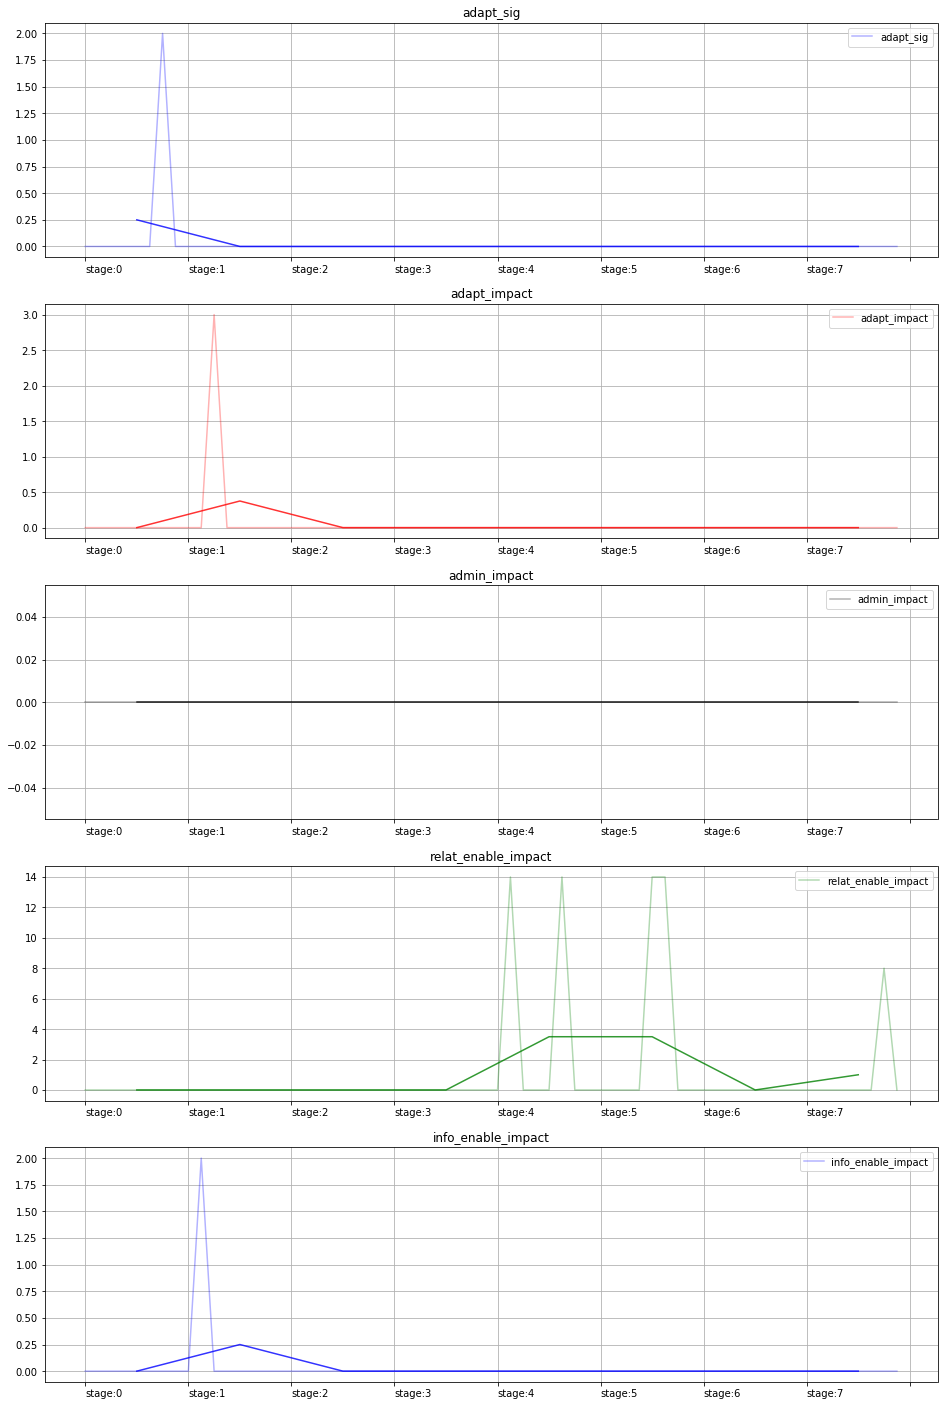

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_1.png


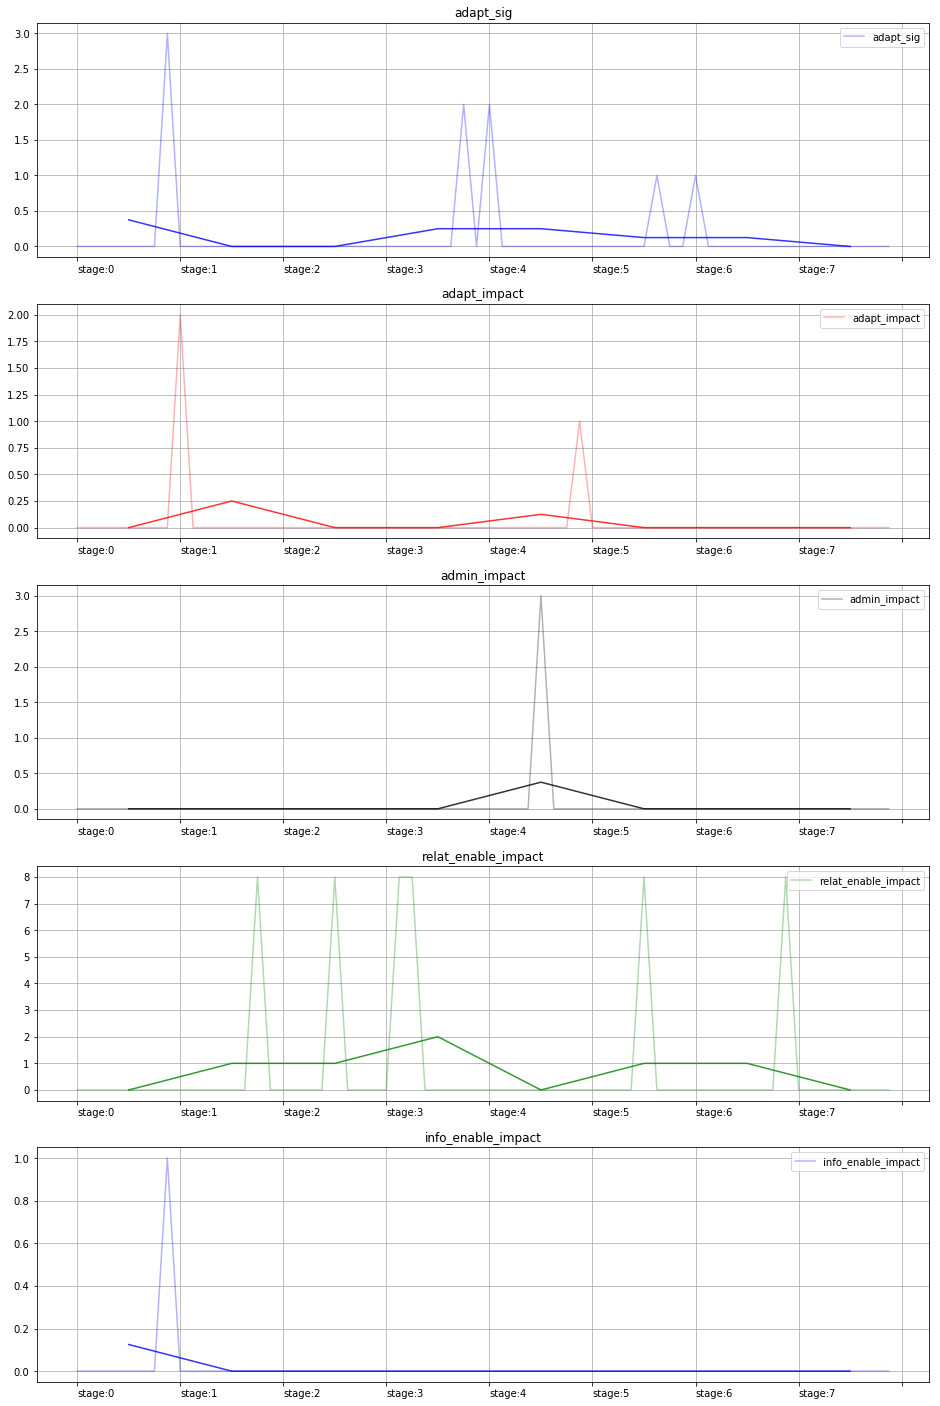

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_2.png


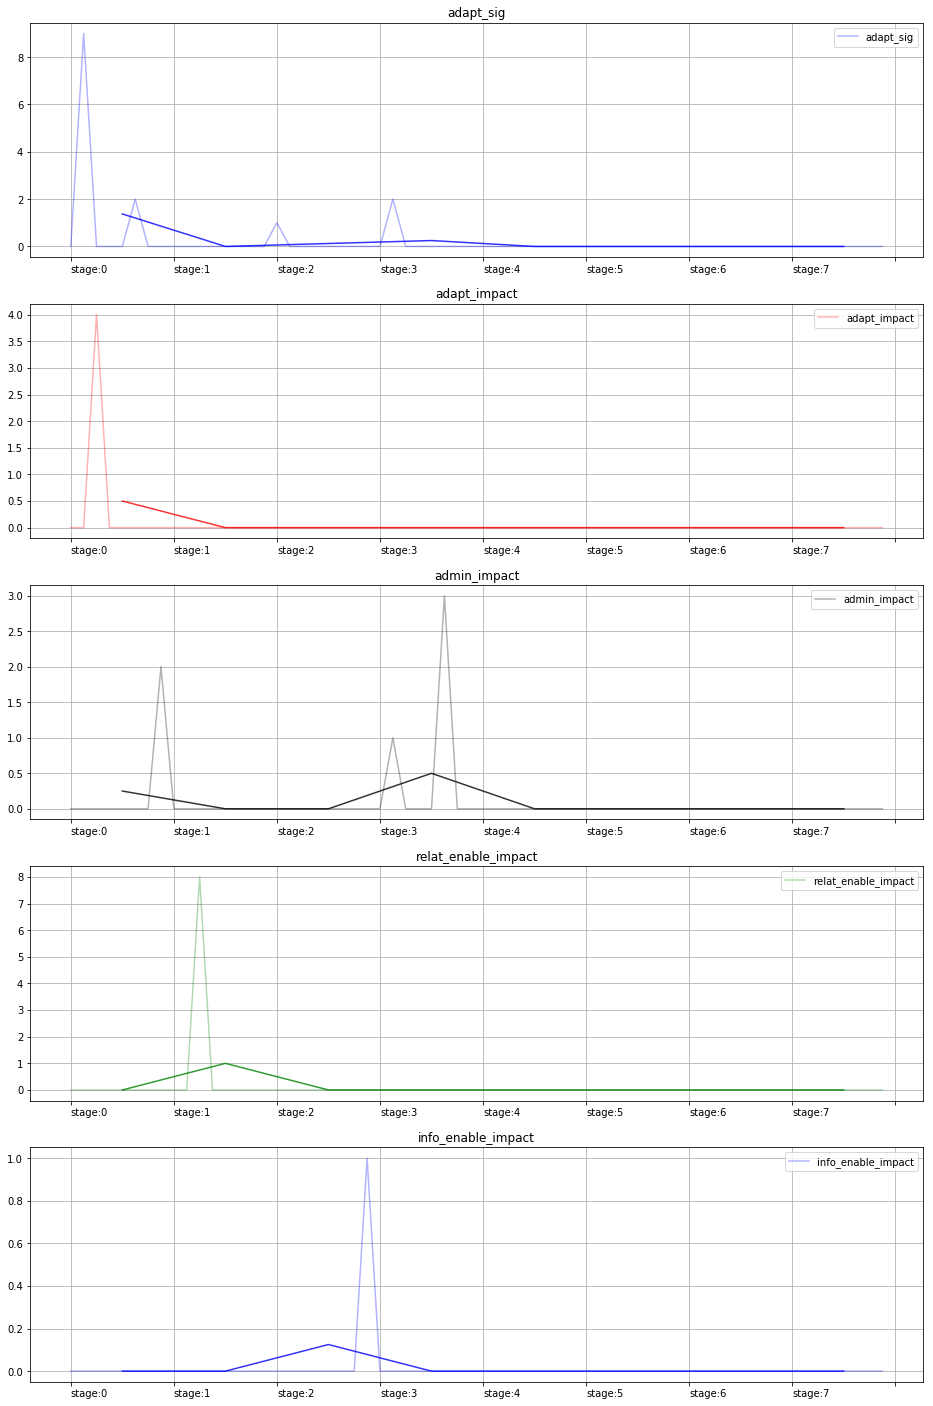

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_3.png


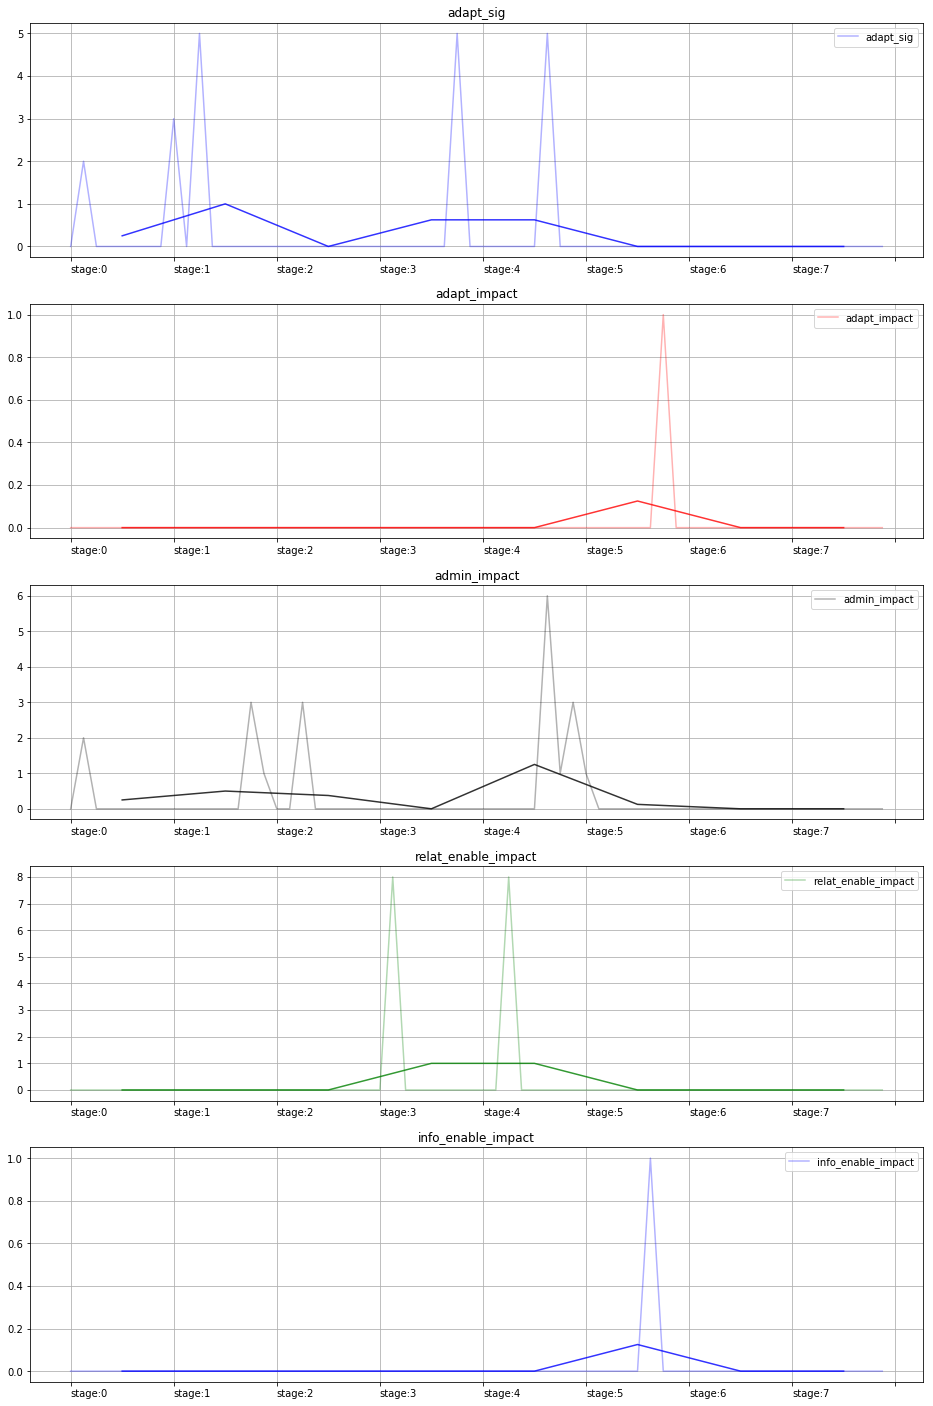

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_4.png


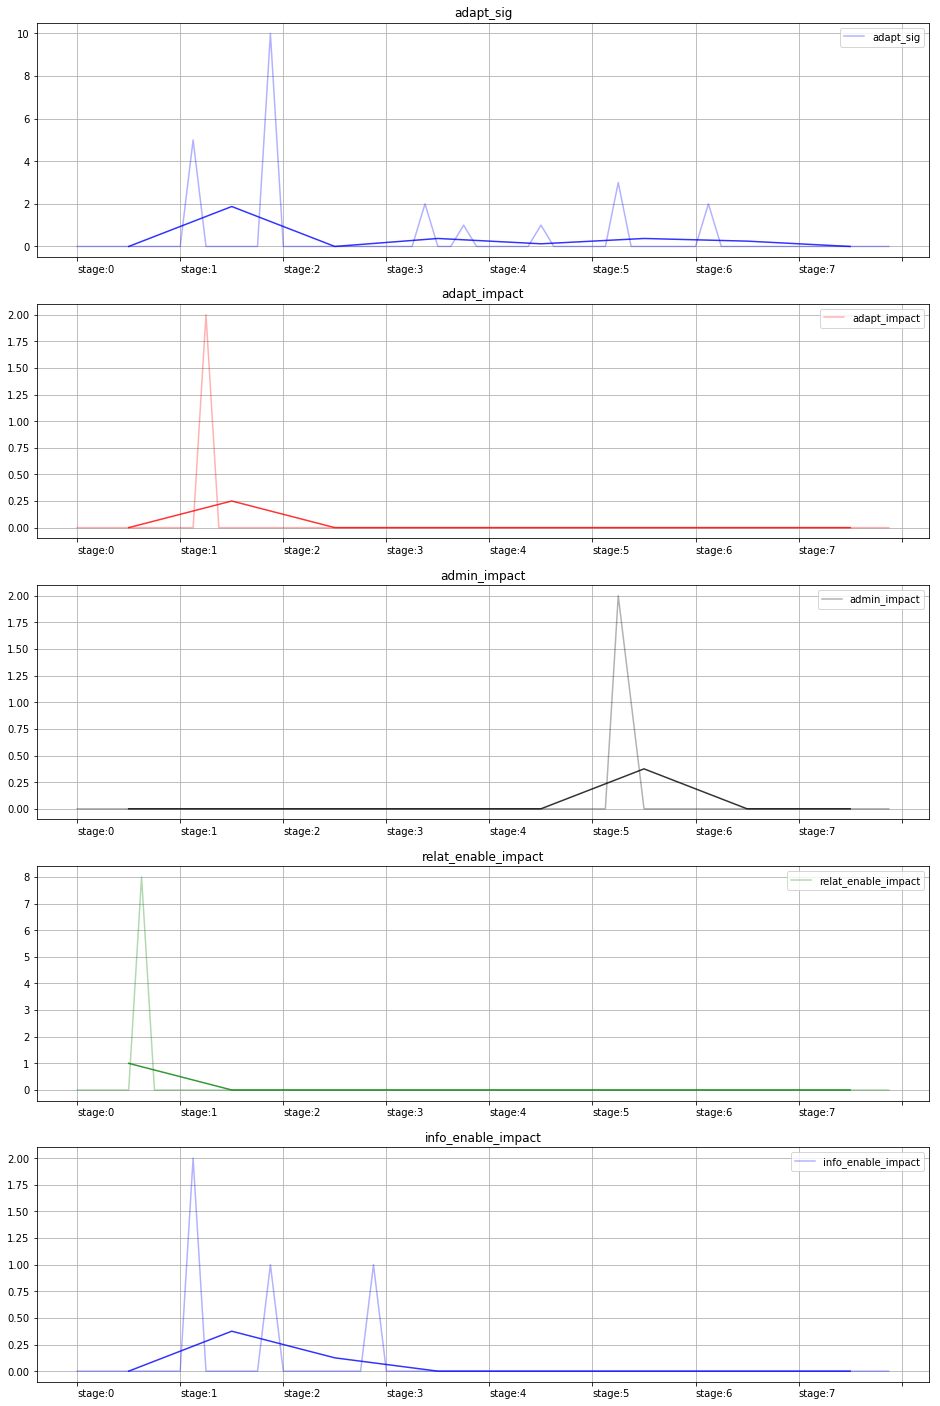

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_5.png


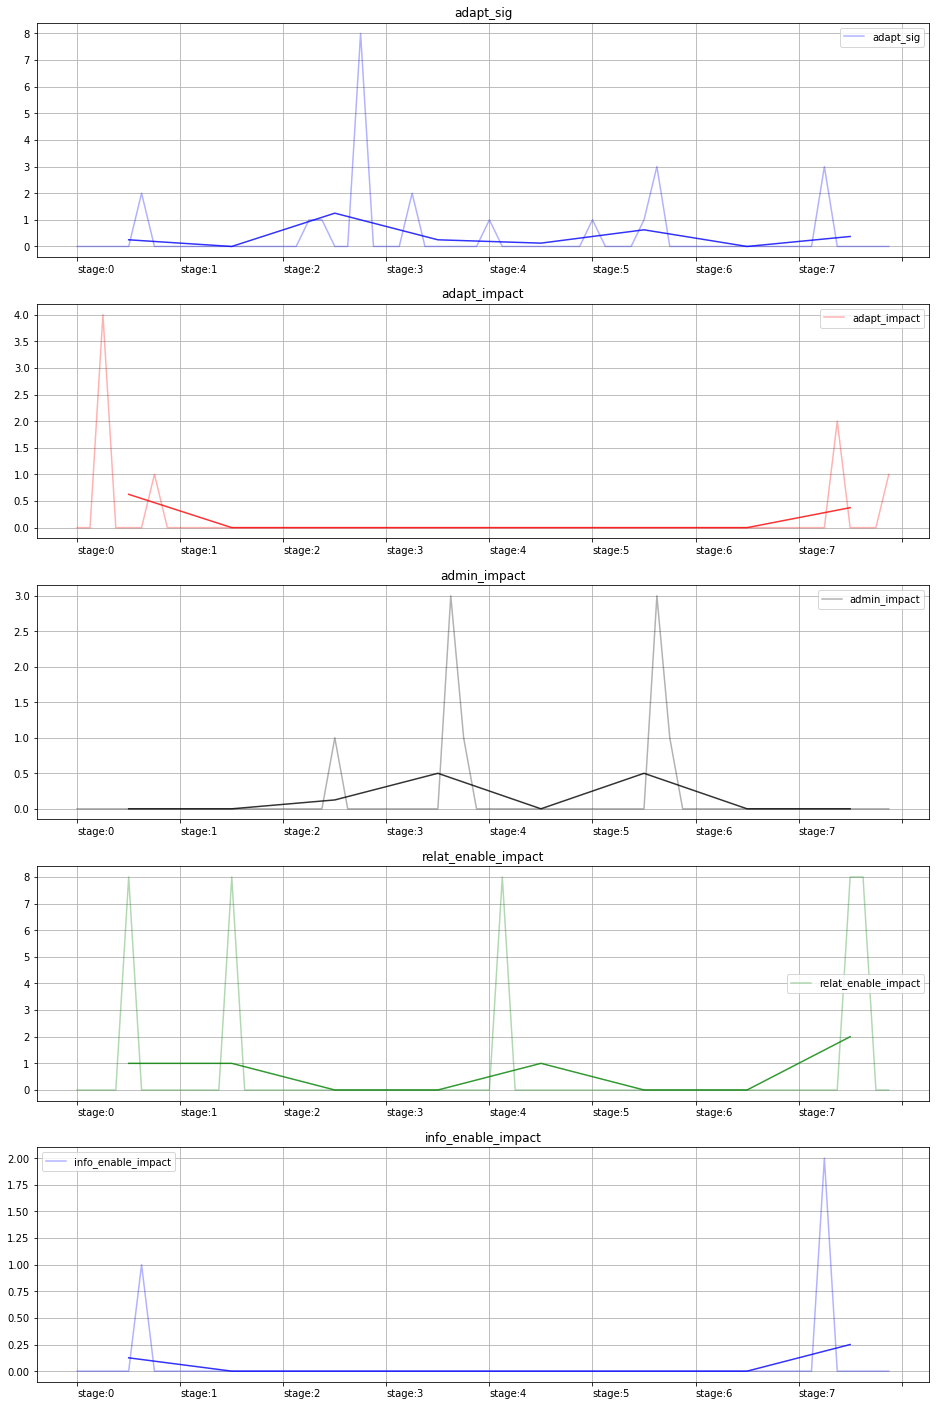

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_6.png


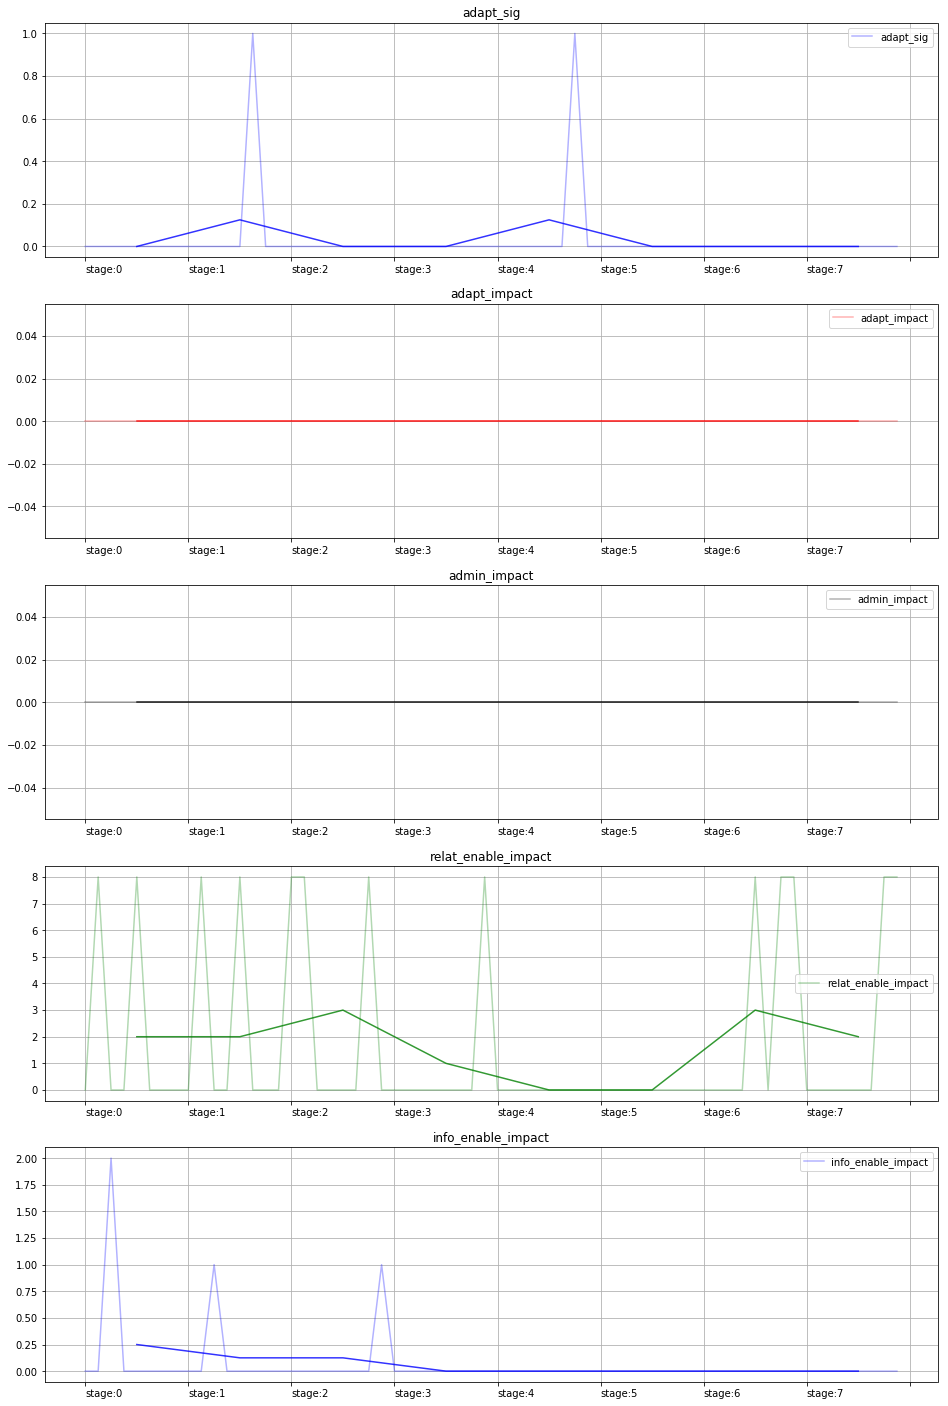

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_7.png


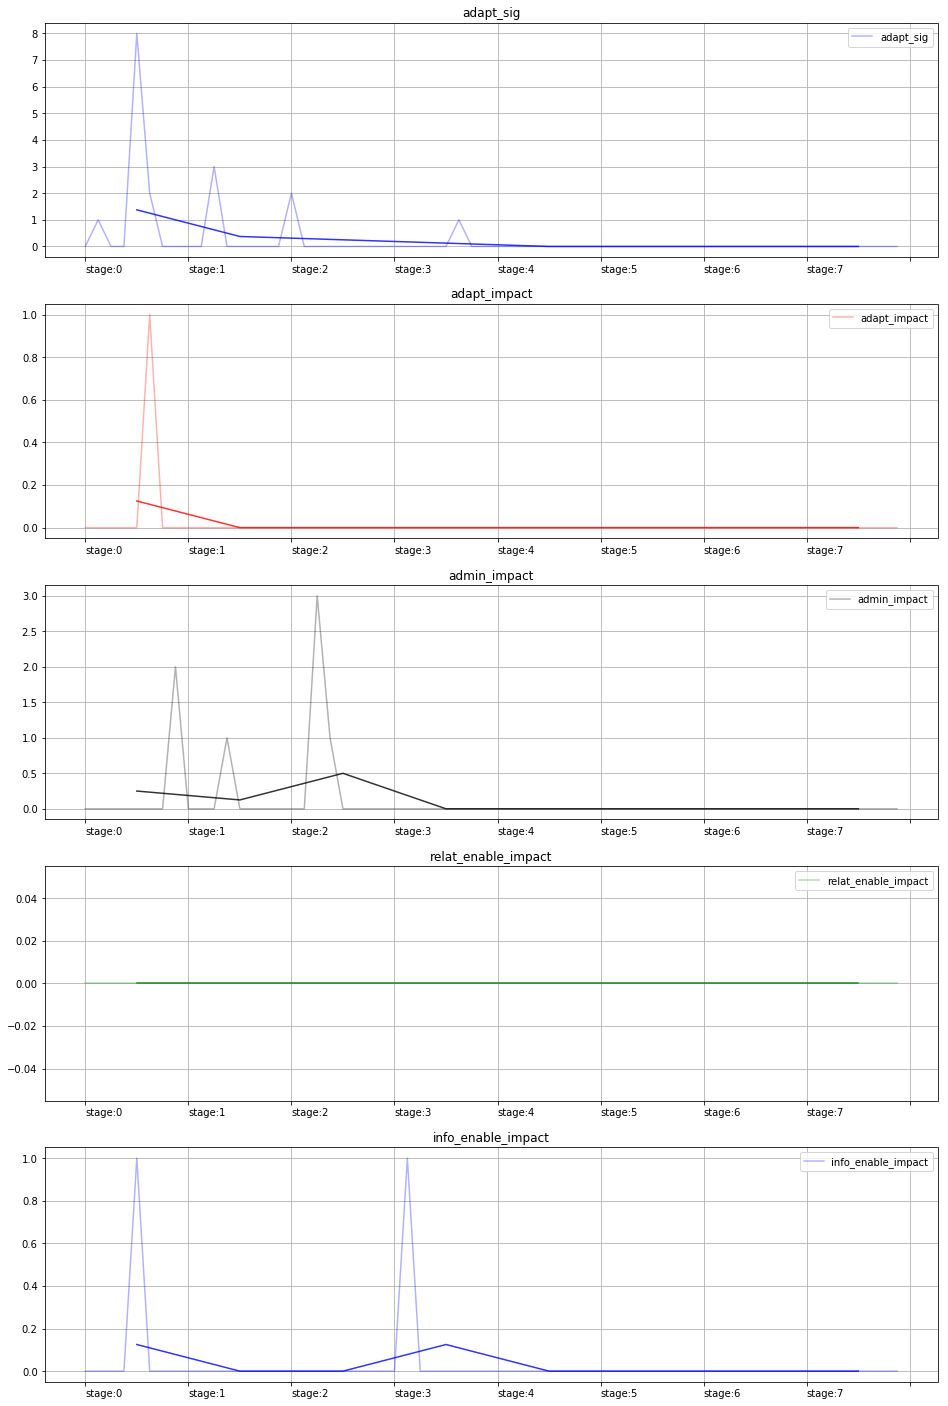

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_8.png


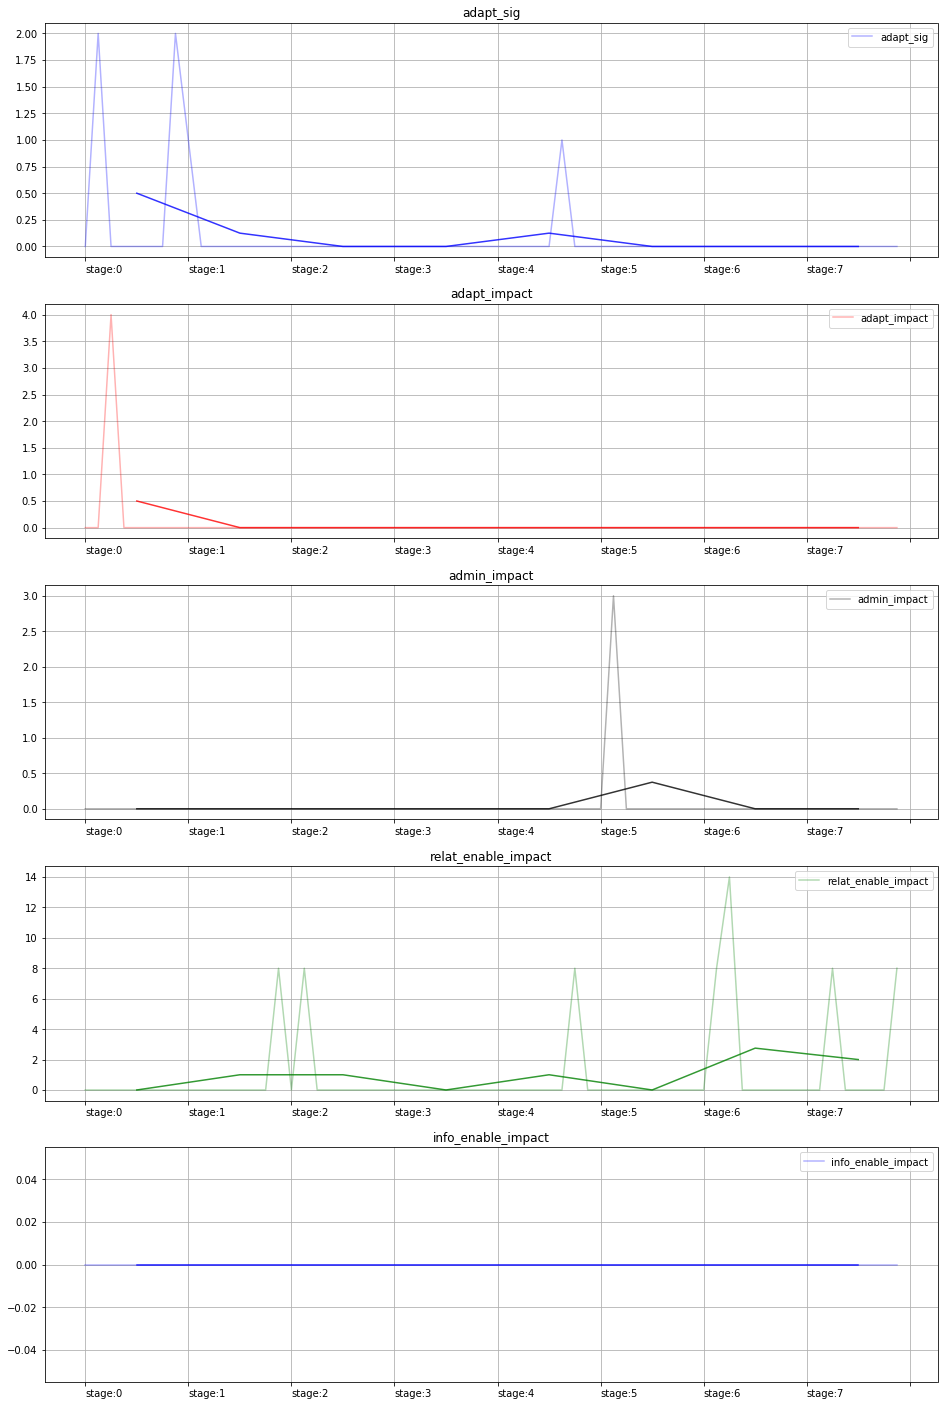

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_9.png


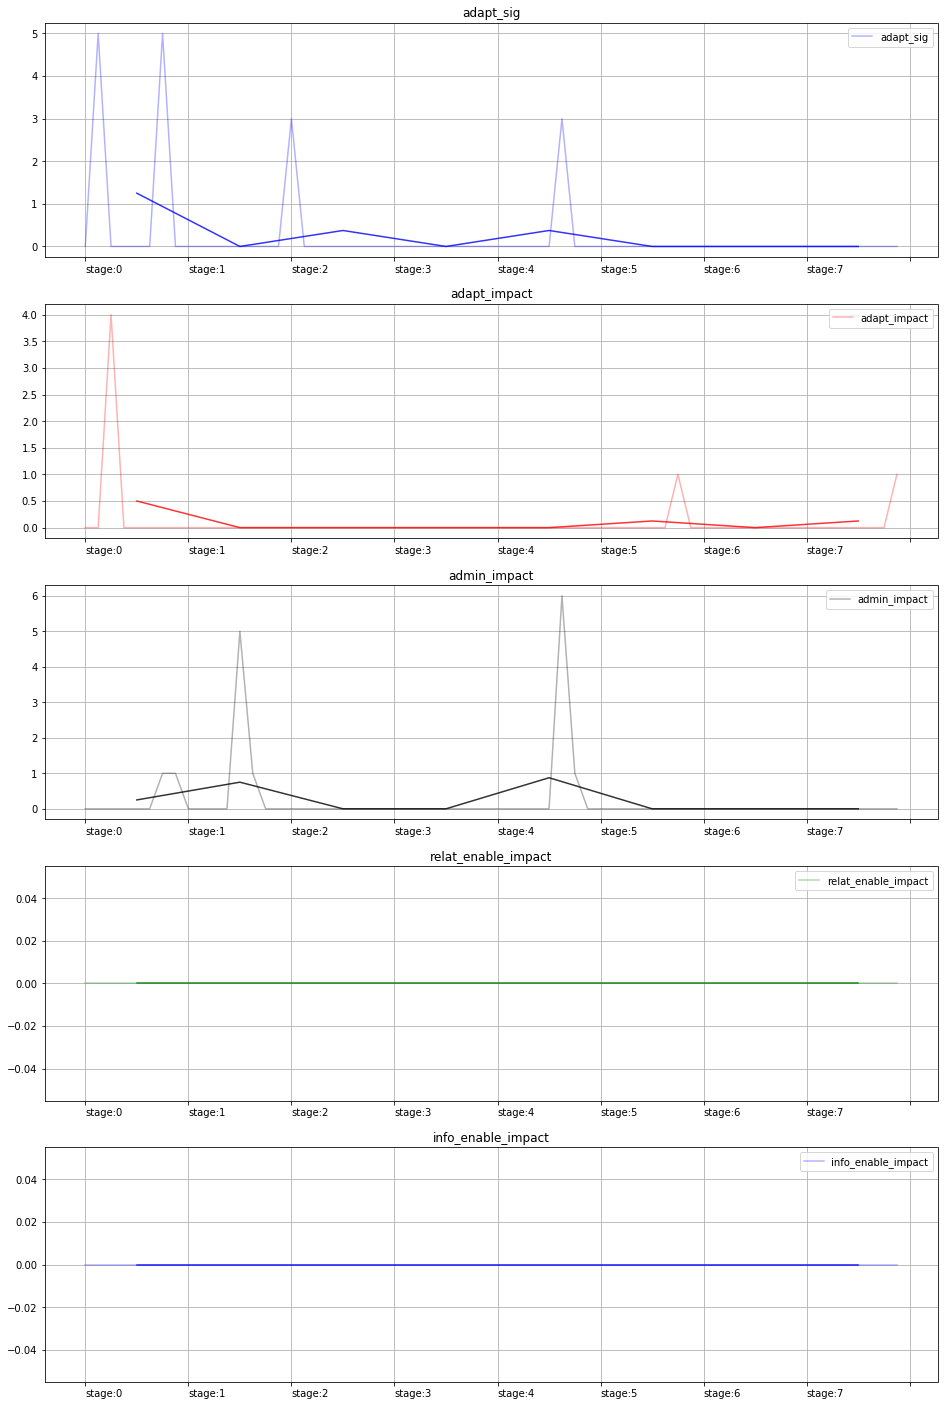

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_10.png


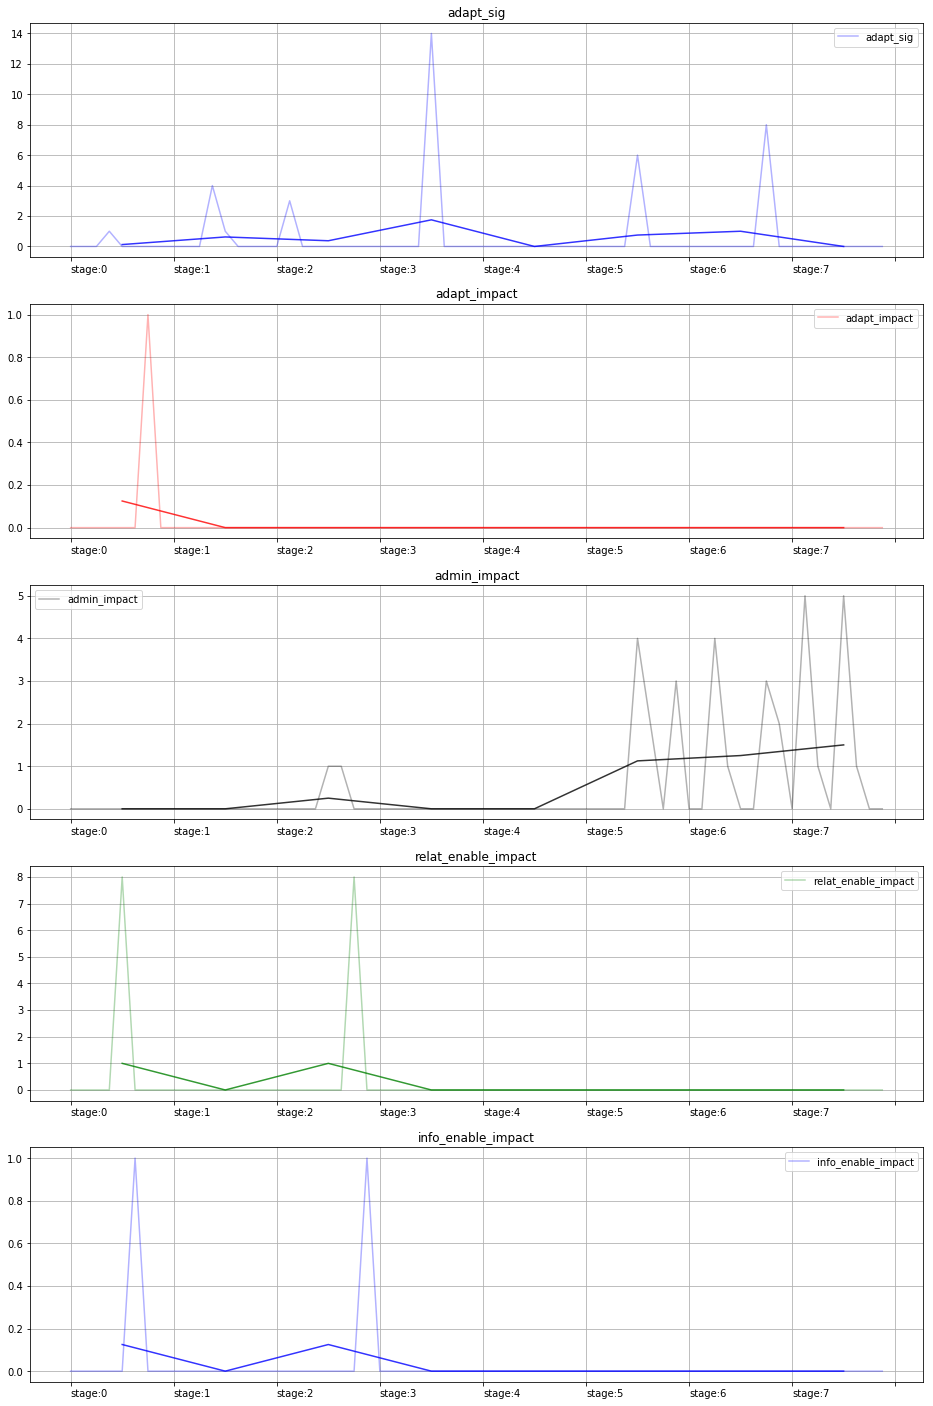

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_11.png


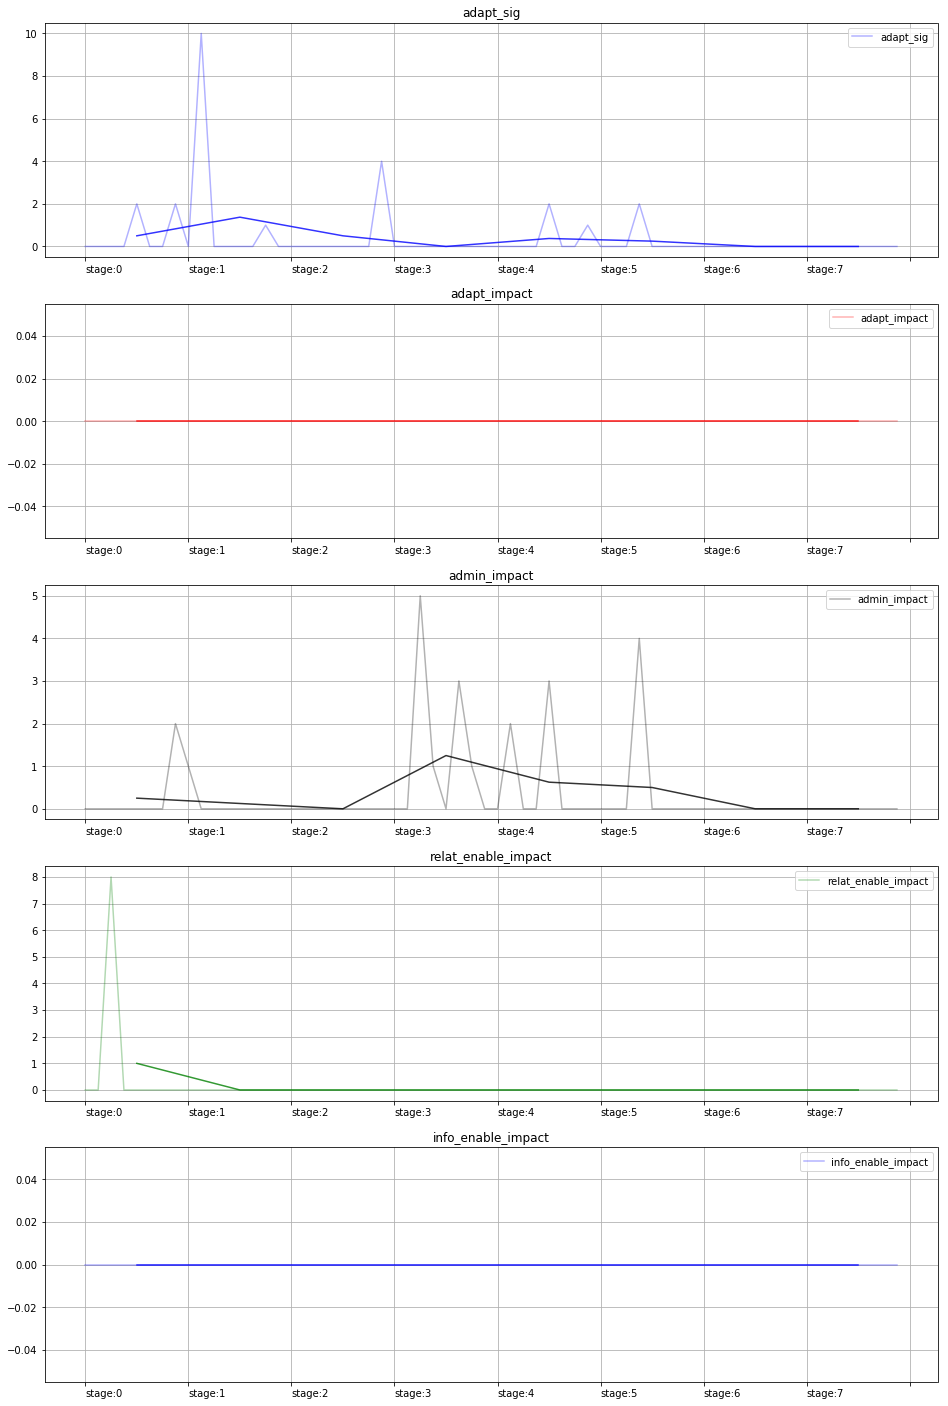

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_12.png


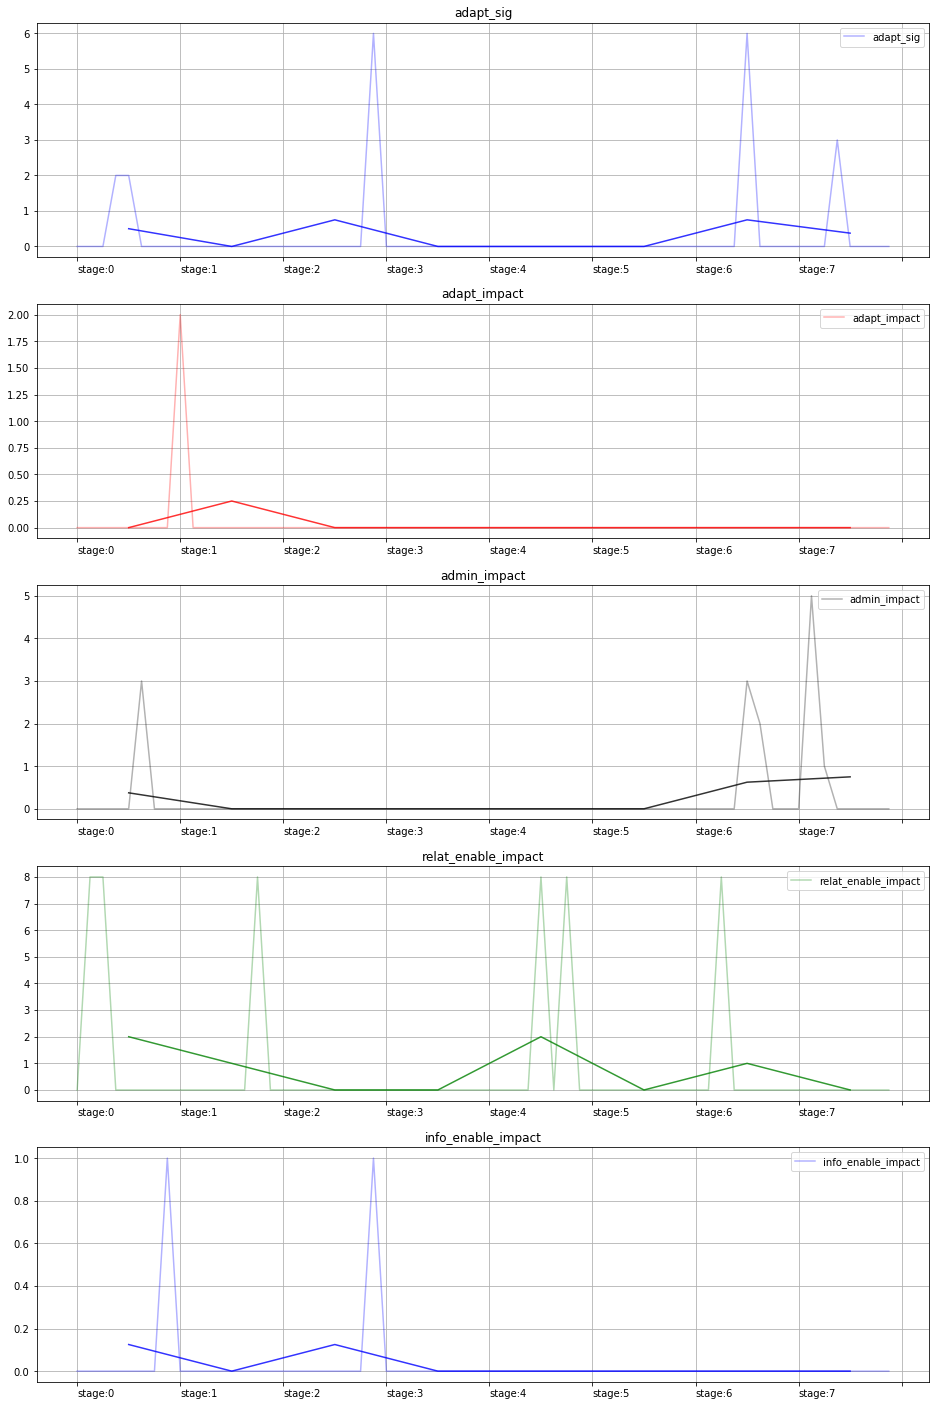

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_13.png


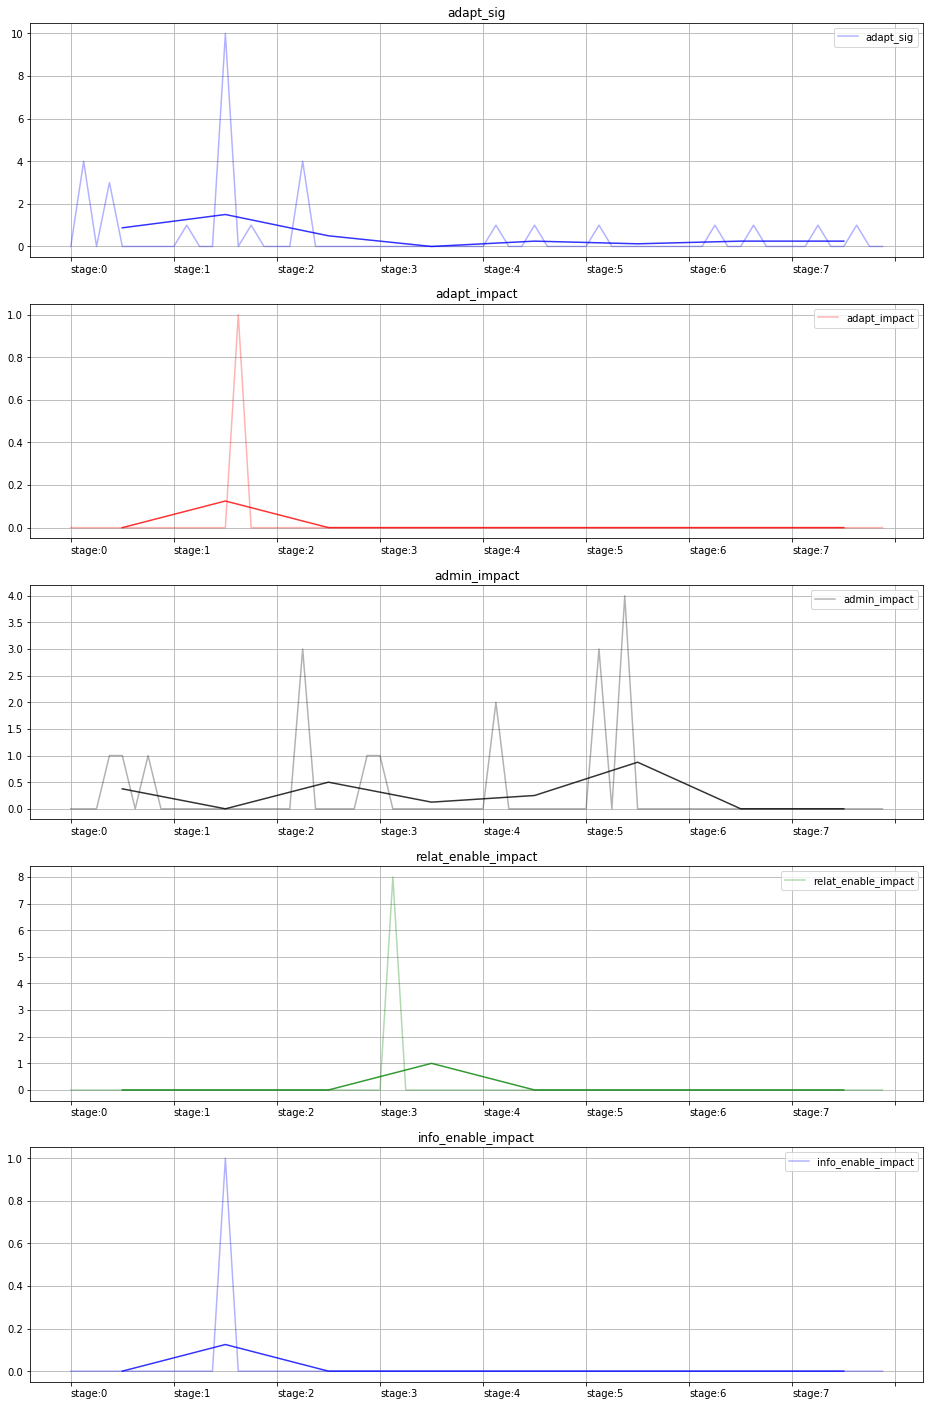

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_14.png


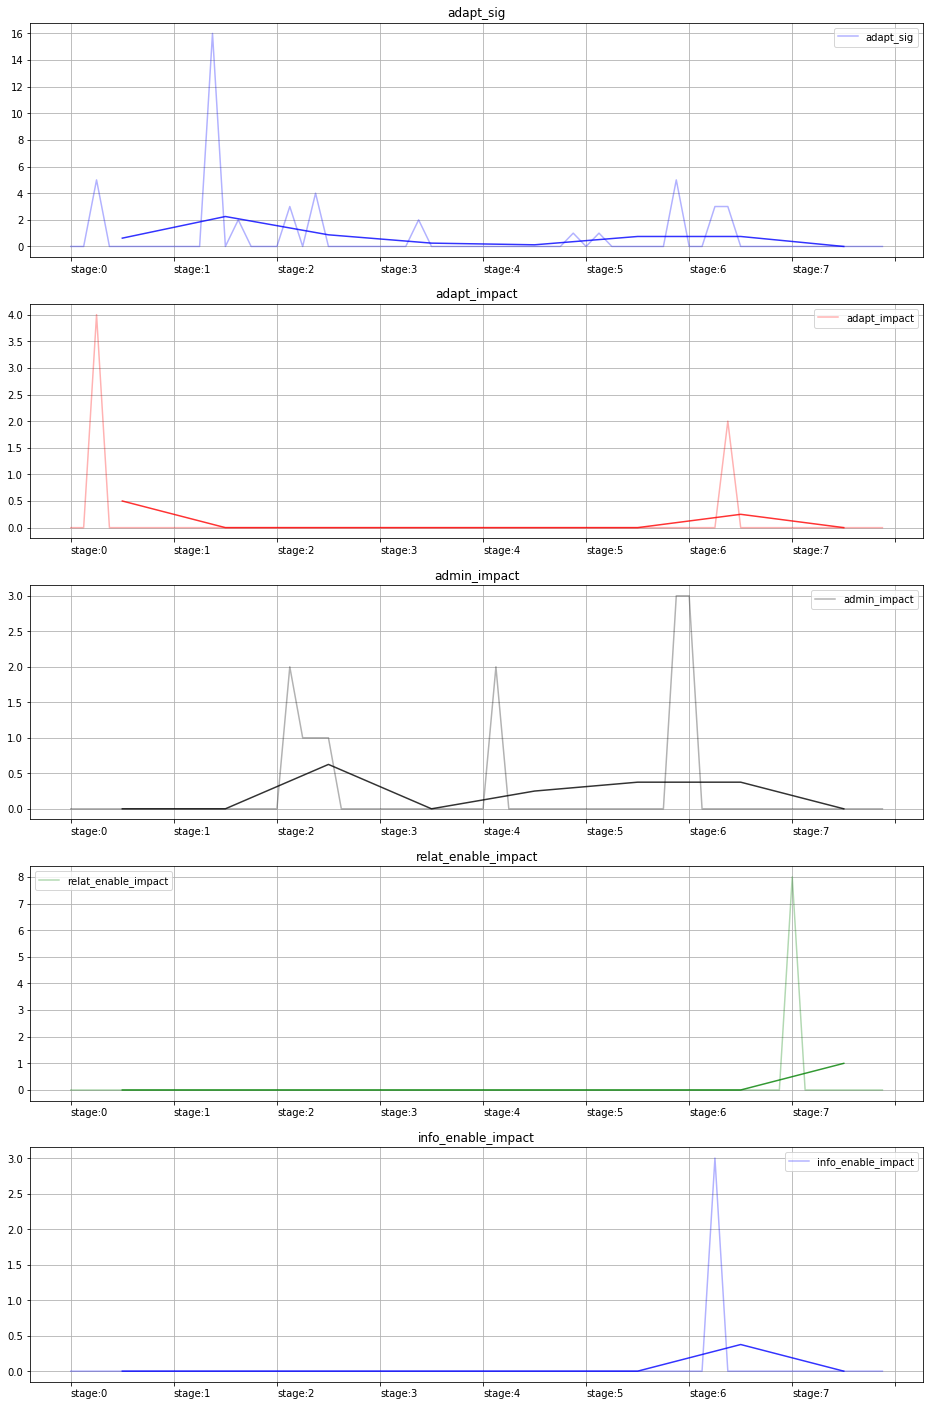

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_15.png


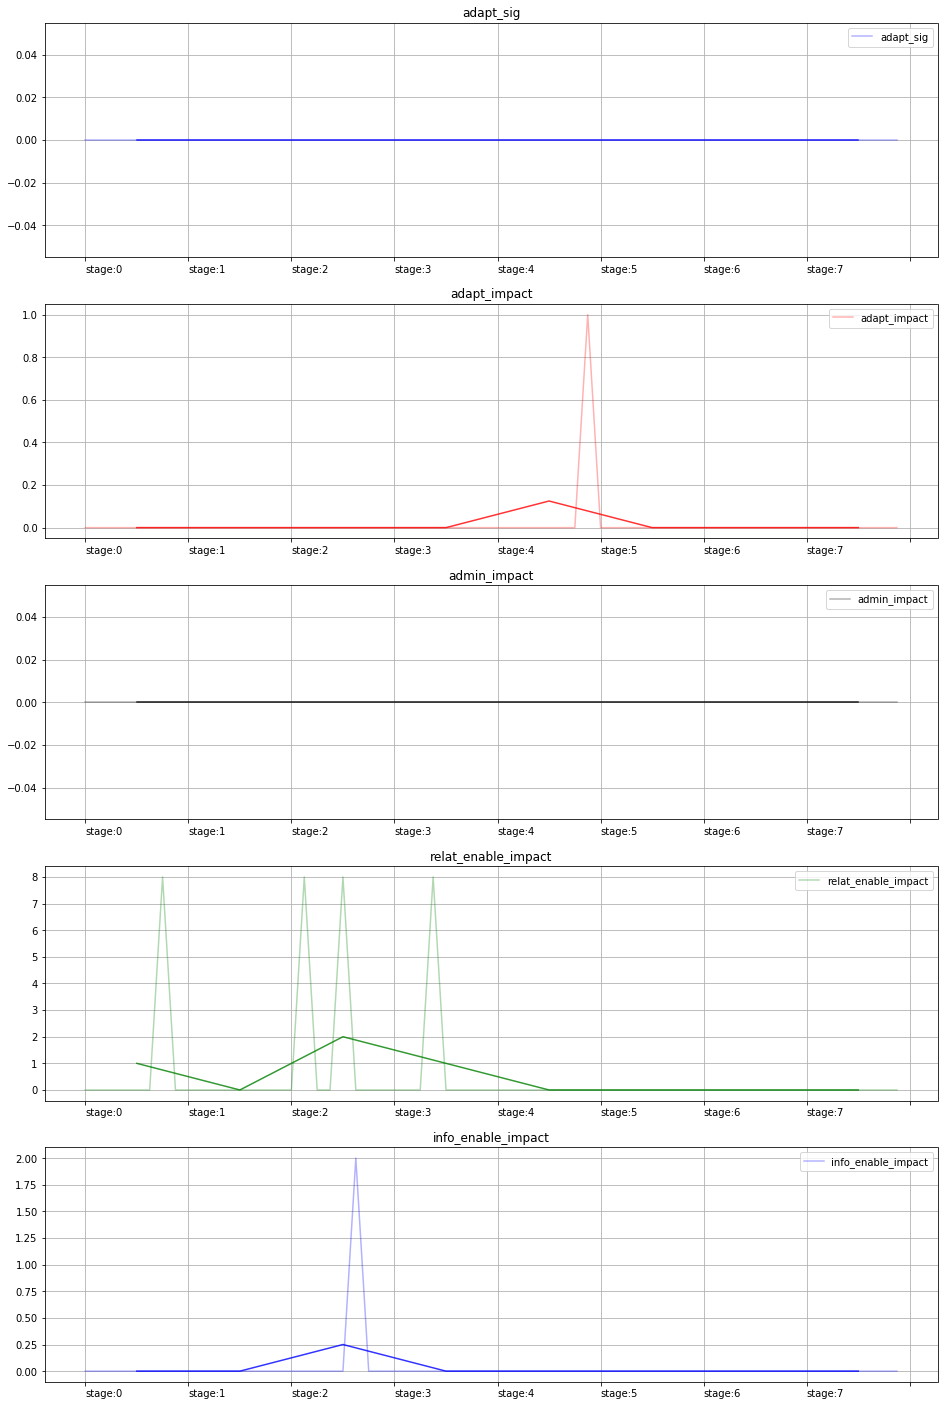

../../result/batch_20181223-010150_NA16_N5_K3_P7_T64_Ts8/mul_20181223-010150_exp0/leadership_img/mul_20181223-010150_exp0_leadership_sum.png


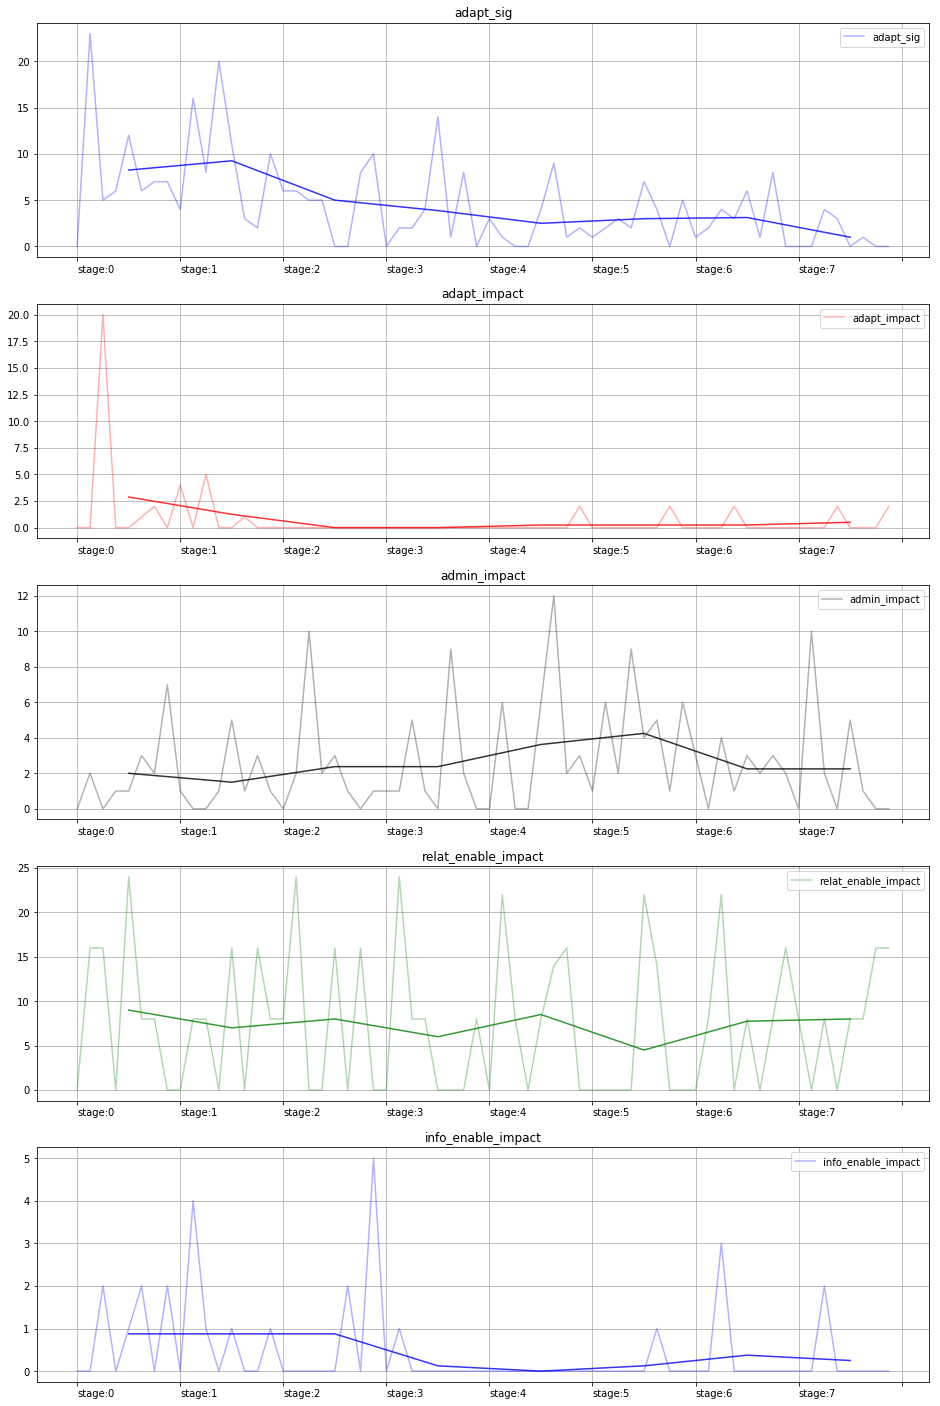

In [74]:
NA,N,K,P = 16, 5, 3, 7
T,Ts = 64,8
group_num = T // Ts
batch_name = "20181223-010150"

leadership_bill_dir = "../../result/batch_{batch_name}_NA{NA}_N{N}_K{K}_P{P}_T{T}_Ts{Ts}".format(batch_name=batch_name,
                                                                                               NA=NA, N=N, K=K, P=P,
                                                                                               T=T, Ts=Ts)
with open(os.path.join(leadership_bill_dir, "exp_list.csv"), "r") as fp:
    print(leadership_bill_dir)
    exp_name_list = [row.strip() for row in fp.readlines()]
    print(exp_name_list)
for exp_name in exp_name_list:
    exp_dir = os.path.join(leadership_bill_dir, exp_name)
    bill_csv_path = os.path.join(exp_dir, exp_name + "_leadership_bill.csv")
    save_png_dir = os.path.join(exp_dir, "leadership_img")
    print(bill_csv_path)
    print(save_png_path)
    try:
        os.makedirs(save_png_dir)
    except:
        pass
    for agent_id in list(range(NA)) + ['sum']:
        save_png_path=os.path.join(save_png_dir, exp_name + '_leadership_' + str(agent_id) + '.png')
        datas = [
            select_data_from_leadershipbill(bill_path=bill_csv_path,
                                                agent_id=agent_id, select_key='adapt_sig'),
            select_data_from_leadershipbill(bill_path=bill_csv_path,
                                                agent_id=agent_id, select_key='adapt_impact'),
            select_data_from_leadershipbill(bill_path=bill_csv_path,
                                                agent_id=agent_id, select_key='admin_impact'),
            select_data_from_leadershipbill(bill_path=bill_csv_path,
                                                agent_id=agent_id, select_key='relat_enable_impact'),
            select_data_from_leadershipbill(bill_path=bill_csv_path,
                                                agent_id=agent_id, select_key='info_enable_impact'),
        ]
        print(save_png_path)
        draw_concate(datas, group_num, ['blue', 'red', 'black', 'green', 'blue'],
                    ['adapt_sig','adapt_impact','admin_impact',  'relat_enable_impact','info_enable_impact'],
                    save_fig_path=save_png_path)